In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 64.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd




import folium
from folium import plugins
import geopandas as gpd
import branca

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import ttest_ind

plt.rcParams["font.family"] = "monospace"
plt.rcParams['figure.dpi'] = 150
background_color='#F5F4EF'



HEADER = '\033[95m'
OKBLUE = '\033[94m'
OKCYAN = '\033[96m'
OKGREEN = '\033[92m'
WARNING = '\033[93m'
FAIL = '\033[91m'
ENDC = '\033[0m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
population = pd.read_csv('/content/drive/MyDrive/эконометрика/ИДЗ/population_by_country_2020 (1).csv')
regions = pd.read_csv('/content/drive/MyDrive/эконометрика/ИДЗ/noc_regions.csv')

df = pd.read_csv('/content/drive/MyDrive/эконометрика/ИДЗ/athlete_events.csv')
df_21 = pd.read_csv('/content/drive/MyDrive/эконометрика/ИДЗ/Tokyo 2021 dataset.csv')
df_21_full = pd.read_csv('/content/drive/MyDrive/эконометрика/ИДЗ/Tokyo 2021 dataset v4.csv')



In [ ]:
# For geographic plotting
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

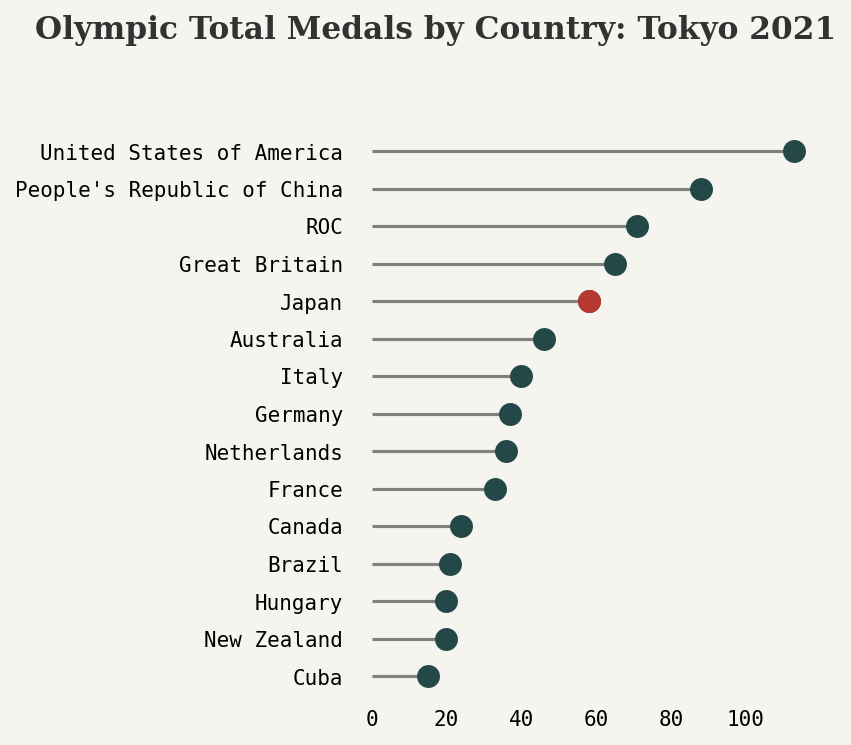

In [ ]:

fig, ax = plt.subplots(figsize=(4, 5), facecolor=background_color)

temp = df_21_full[:15].sort_values(by='Total')
my_range=range(1,len(df_21_full[:15]['Team/NOC'])+1)


ax.set_facecolor(background_color)

#B73832



plt.hlines(y=my_range, xmin=0, xmax=temp['Total'], color='gray')
plt.plot(temp['Total'], my_range, "o",markersize=10, color='#244747')
plt.plot(temp['Total'][2], my_range[10], "o",markersize=10,color='#B73832')


Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Total Medals",fontfamily='monospace',loc='left',color='gray')
ax.set_axisbelow(True)


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)



ax.text(-90,Yend+2.3, 'Olympic Total Medals by Country: Tokyo 2021', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')





s
plt.yticks(my_range, temp['Team/NOC'])
plt.xlabel('')




plt.show()

In [ ]:
def highlight(nation):
    if nation['Team/NOC'] == 'Japan':
        return ['background-color: #f3f2f1']*6
    else:
        return ['background-color: white']*6

df_21_full[['Rank','Team/NOC','Bronze Medal','Silver Medal','Gold Medal','Total']].iloc[:15].style.set_caption('Medals by Country: Summer Olympic Games sorted by Gold Medals [Top 15]')\
.bar(subset=['Gold Medal'], color='#f0c05a')\
.bar(subset=['Silver Medal'], color='Lightgray')\
.bar(subset=['Bronze Medal'], color='#a97142')\
.hide_index().apply(highlight, axis=1)

Rank,Team/NOC,Bronze Medal,Silver Medal,Gold Medal,Total
1,United States of America,33,41,39,113
2,People's Republic of China,18,32,38,88
3,Japan,17,14,27,58
4,Great Britain,22,21,22,65
5,ROC,23,28,20,71
6,Australia,22,7,17,46
7,Netherlands,14,12,10,36
8,France,11,12,10,33
9,Germany,16,11,10,37
10,Italy,20,10,10,40


In [ ]:

global_polygons = gpd.read_file(country_shapes)
global_polygons.to_file('global_polygons.geojson', driver = 'GeoJSON')



df = pd.merge(df,regions,left_on='NOC',right_on='NOC')
df = df.query('Season == "Summer"')

In [ ]:

df.replace('USA', "United States of America", inplace = True)
df.replace('Tanzania', "United Republic of Tanzania", inplace = True)
df.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
df.replace('Congo', "Republic of the Congo", inplace = True)
df.replace('Lao', "Laos", inplace = True)
df.replace('Syrian Arab Republic', "Syria", inplace = True)
df.replace('Serbia', "Republic of Serbia", inplace = True)
df.replace('Czechia', "Czech Republic", inplace = True)
df.replace('UAE', "United Arab Emirates", inplace = True)
df.replace('UK', "United Kingdom", inplace = True)

population.replace('United States', "United States of America", inplace = True)
population.replace('Czech Republic (Czechia)', "Czech Republic", inplace = True)
population.replace('DR Congo', "Democratic Republic of the Congo", inplace = True)
population.replace('Serbia', "Republic of Serbia", inplace = True)
population.replace('Tanzania', "United Republic of Tanzania", inplace = True)

df_21_full.replace('Great Britain', "United Kingdom", inplace = True)
df_21_full.replace("People's Republic of China", "China", inplace = True)
df_21_full.replace("ROC", "Russia", inplace = True)


In [ ]:


def host_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London":
        return "United Kingdom"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis":
        return  "United States of America"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "South Korea"
    elif col == "Moskva":
        return  "Russia"
    elif col == "Montreal":
        return  "Canada"
    elif col == "Munich" or col == "Berlin":
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo":
        return  "Japan"
    elif col == "Roma":
        return  "Italy"
    elif col == "Paris":
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    else:
        return "Other"




df['Host_Country'] = df['City'].apply(host_country)

In [ ]:
df_new = df.groupby(['Year','Host_Country','region','Medal'])['Medal'].count().unstack().fillna(0).astype(int).reset_index()

df_new['Is_Host'] = np.where(df_new['Host_Country'] == df_new['region'],1,0)
df_new['Total Medals'] = df_new['Bronze'] + df_new['Silver'] + df_new['Gold']

In [ ]:

df_21_full_refined = df_21_full[['Team/NOC', "Gold Medal", "Silver Medal", "Bronze Medal"]]
df_21_full_refined['Total Medals'] = df_21_full_refined[["Gold Medal", "Silver Medal", "Bronze Medal"]].sum(axis=1)
df_21_full_refined['Year'] = 2021

df_21_full_refined = df_21_full_refined.rename(columns={'Gold Medal':'Gold', 'Silver Medal':'Silver','Bronze Medal':'Bronze'})

df_21_full_refined['Is_Host'] = np.where(df_21_full_refined['Team/NOC'] == 'Japan',1,0)
df_21_full_refined['Host_Country'] = 'Japan'
df_21_full_refined = df_21_full_refined.rename(columns={'Team/NOC':'region'})


df_new = df_new.append(df_21_full_refined)



df_new = df_new.query("region != 'Russia' | region != 'ROC'")

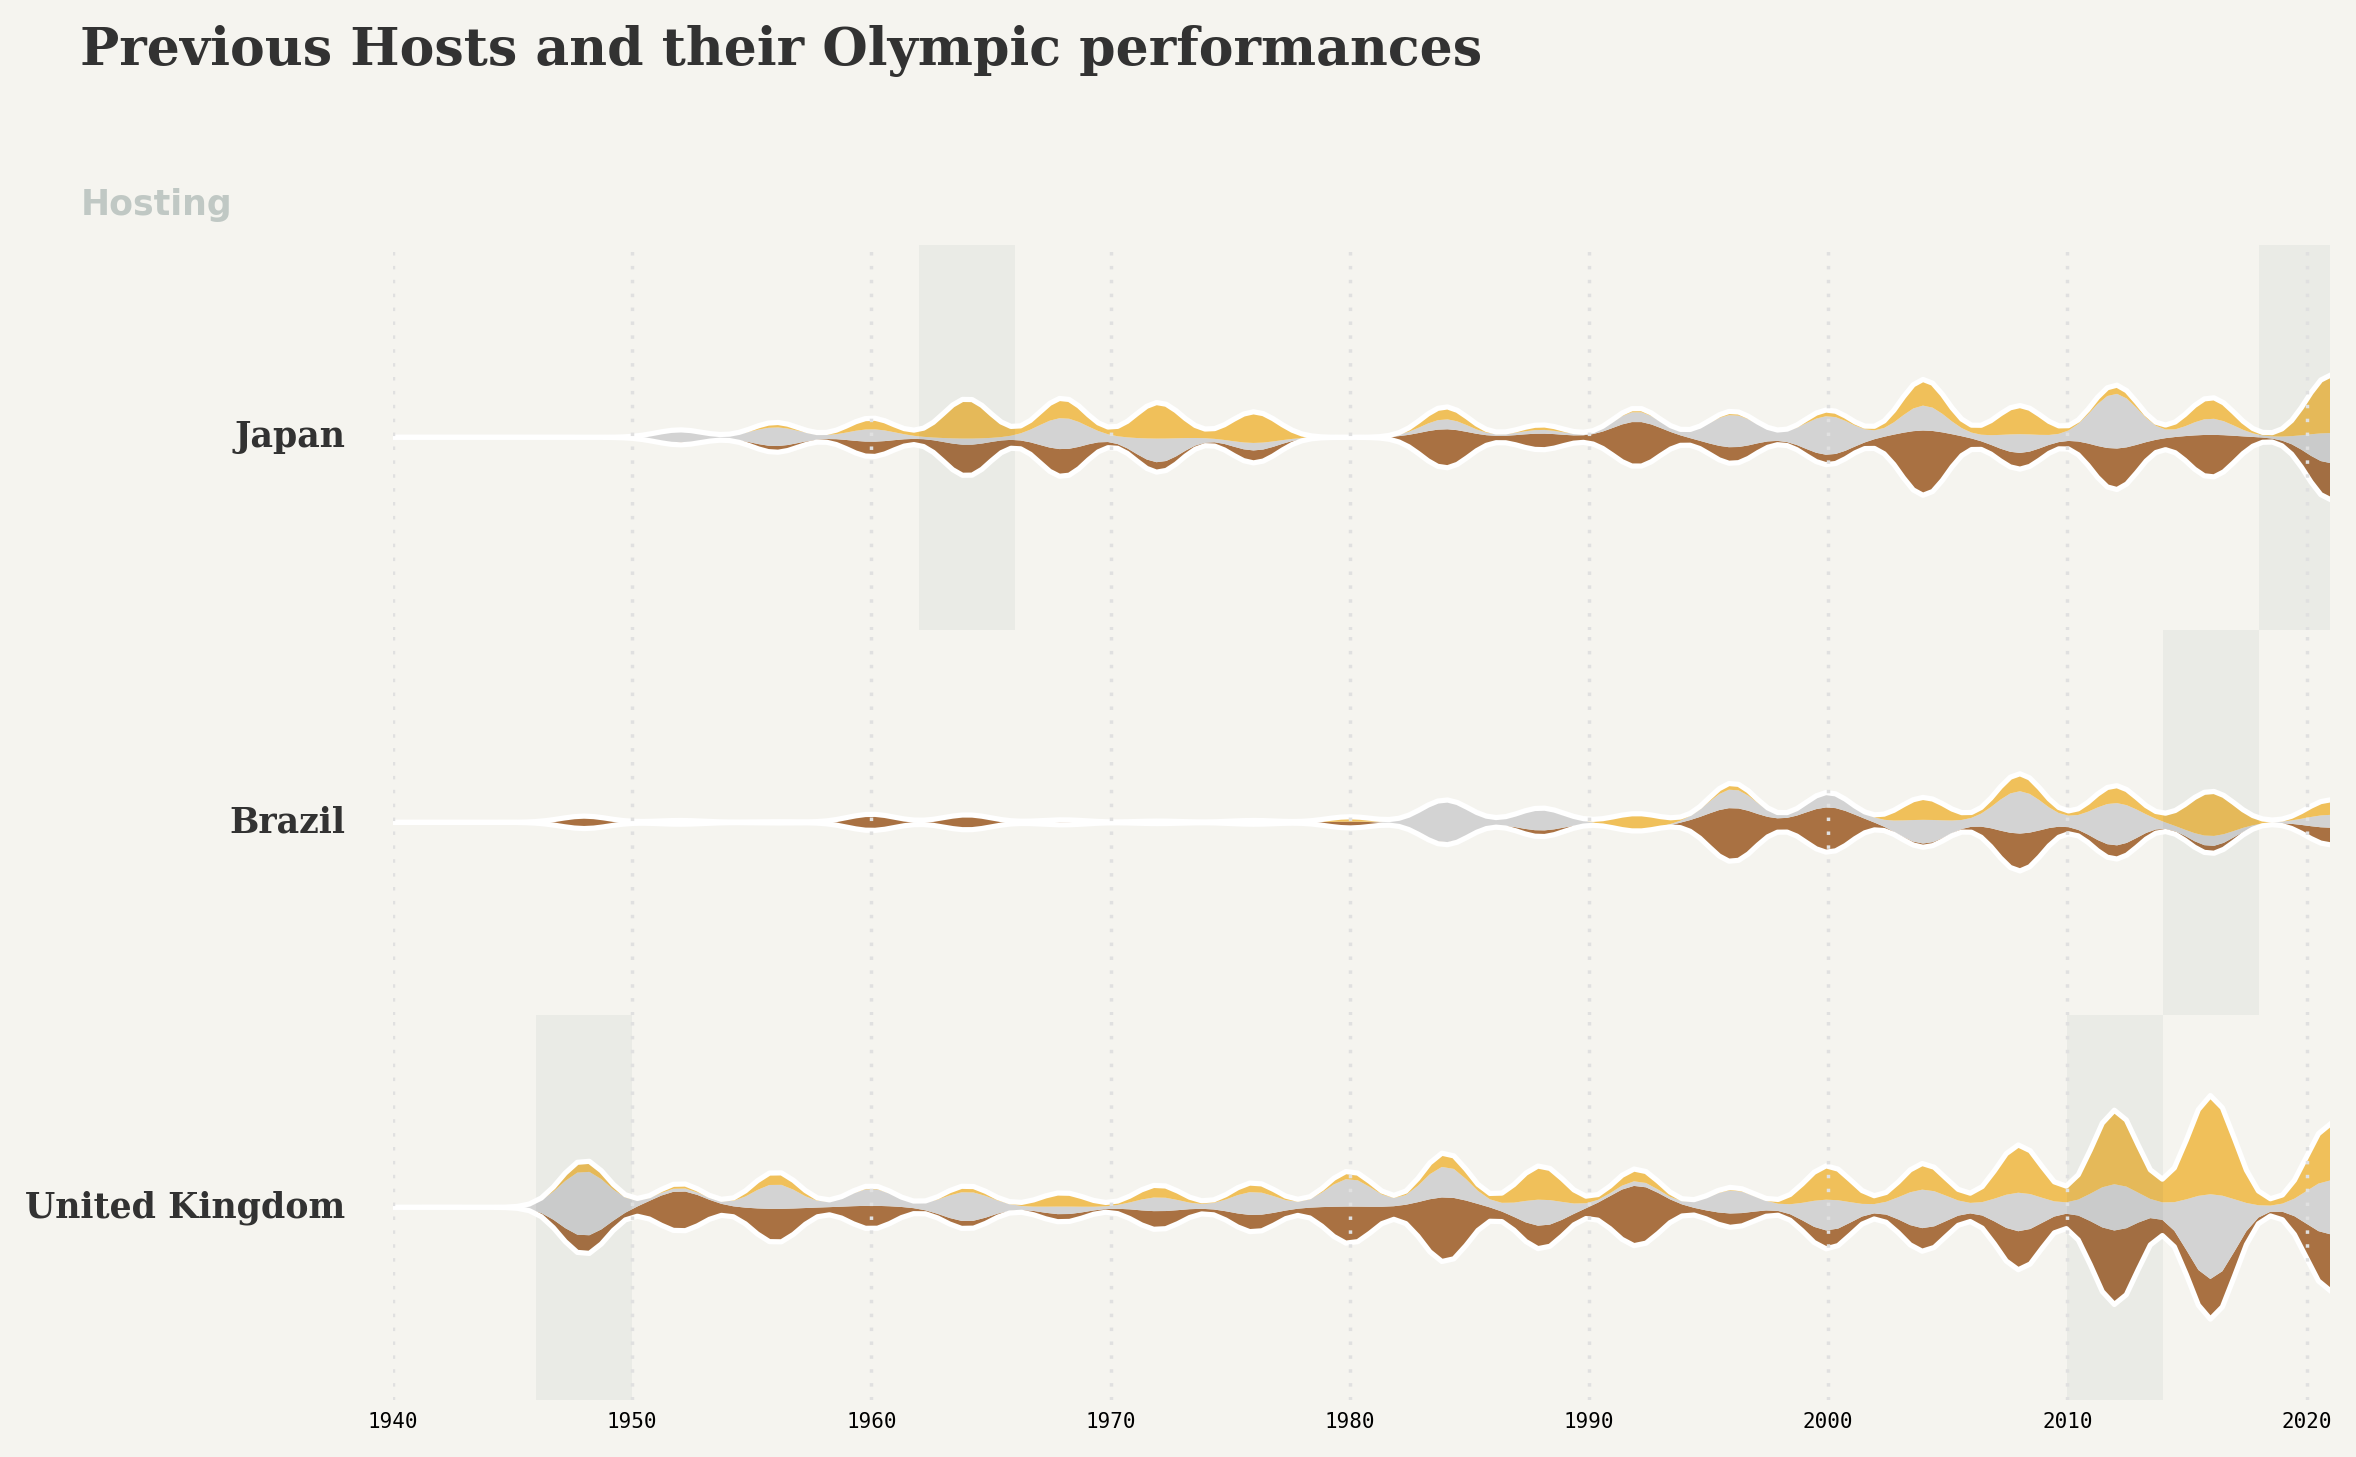

In [ ]:

def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], c[1] * amount, c[2])

def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    weights = weights / weights.sum(0)
    return (weights * y).sum(1)



fig, ax = plt.subplots(3,1, figsize=(10, 6),dpi=250, facecolor=background_color)


colors = ['#a97142', 'lightgray', '#f0c05a']

x_ticks = [1940,1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

for axes, country in enumerate(['Japan', 'Brazil', 'United Kingdom']):

        stream = df_new.query(f"region = ='{country}'")[['Year','Gold', 'Silver','Bronze']]
        y = [stream['Bronze'].values, stream['Silver'].values, stream['Gold'].values]
        x = np.array(df_new.query(f"region == '{country}'")['Year'])

        grid = np.linspace(x.min(), x.max(), num=250)
        y_smoothed = [gaussian_smooth(x, y_, grid, 1) for y_ in y]


        ax[axes].stackplot(grid, y_smoothed, baseline="sym", colors=colors)

        line = np.array(y_smoothed).sum(0)
        ax[axes].plot(grid, line / 2, lw=1.5, color="white")
        ax[axes].plot(grid, -line / 2, lw=1.5, color="white")


        ax[axes].text(1938,0,f'{country}',ha='right',va='center',fontfamily='serif',fontweight='bold',color='#323232')


        ax[axes].set_ylim(-25, 25)
        ax[axes].set_xlim(1940, 2021)
        ax[axes].set_facecolor(background_color)
        ax[axes].spines[:].set_visible(False)
        ax[axes].yaxis.set_visible(False)
        ax[axes].tick_params(axis=u'both', which=u'both',length=0)
        for x_tick in x_ticks:
                ax[axes].axvline(x_tick, color='#e0e0e0', ls=(0, (1, 3)),lw=1, zorder=10)

for axes in range(0,2):
    ax[axes].xaxis.set_visible(False)



ax[2].tick_params(axis='x', labelsize=6, color='#4d4d4d')
ax[2].set_xticks(x_ticks)


ax[0].axvspan(2018,2022, facecolor='#244747',alpha=0.05)
ax[0].axvspan(1962,1966, facecolor='#244747',alpha=0.05)

ax[1].axvspan(2014,2018, facecolor='#244747',alpha=0.05)

ax[2].axvspan(2010,2014, facecolor='#244747',alpha=0.05)
ax[2].axvspan(1946,1950, facecolor='#244747',alpha=0.05)


fig.text(0,1,"Previous Hosts and their Olympic performances", fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')

fig.text(0,0.9, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#244747',alpha=0.25)

##






fig

##
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()


In [ ]:
medals = df.groupby(['region','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

medals['Total'] = medals['Bronze'] + medals['Silver'] + medals['Gold']

medals = medals[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)

medals.iloc[:15].style.set_caption('Medals by Country: Summer Olympic Games [Top 15]')\
.bar(subset=['Gold'], color='#f0c05a')\
.bar(subset=['Silver'], color='Lightgray')\
.bar(subset=['Bronze'], color='#a97142')\
#.background_gradient(subset=['Total'], cmap='BuGn')

Medal,Bronze,Silver,Gold,Total
region,,,,
United States of America,1197,1333,2472,5002
Russia,994,974,1220,3188
Germany,1064,987,1075,3126
United Kingdom,620,729,636,1985
France,587,575,465,1627
Italy,454,474,518,1446
Australia,515,456,362,1333
Hungary,363,328,432,1123
Sweden,358,396,354,1108


In [ ]:
host_list = list(df_new.query("Is_Host == 1")['Host_Country'].value_counts().index)

medals_temp = medals.reset_index()
medals_map = pd.merge(global_polygons, medals_temp, left_on='name',right_on='region')
medals_map['Hosted'] = np.where(medals_map['name'].isin(host_list),1,0)

In [ ]:
def rd2(x):
    return round(x, 2)

Temp = medals_map

minimum, maximum = Temp["Total"].quantile([0.05, 0.95]).apply(rd2)
mean = round(Temp["Total"].mean(), 2)


colormap = branca.colormap.LinearColormap(
    colors=["#f2f0f7", "#cbc9e2", "#9e9ac8", "#756bb1", "#54278f"],
    index=Temp["Total"].quantile([0.25, 0.5, 0.85, 0.95]),
    vmin=minimum,
    vmax=maximum,
)

colormap.caption = "Total medals"

from folium.plugins import Search
from folium.plugins import HeatMap


m = folium.Map(location=(50,0),zoom_start=3)


def style_function(x):
    return {
        "fillColor": colormap(x["properties"]["Total"]),
        "color": "black",
        "weight": 2,
        "fillOpacity": 0.5,
    }


Map_Layer = folium.GeoJson(
    Temp,
    name="Medals",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=["name","Total","Gold","Silver","Bronze"], aliases=["Country","Total Medals","Gold","Silver","Bronze"], localize=True
    ),
).add_to(m)


plugins.Search(Map_Layer,position='topleft',
                           search_zoom=5,placeholder="Search for a country",weight=3,
                           search_label='region',
                           geom_type='Polygon').add_to(m)


minimap = plugins.MiniMap()
m.add_child(minimap)

folium.LayerControl().add_to(m)
colormap.add_to(m)

m

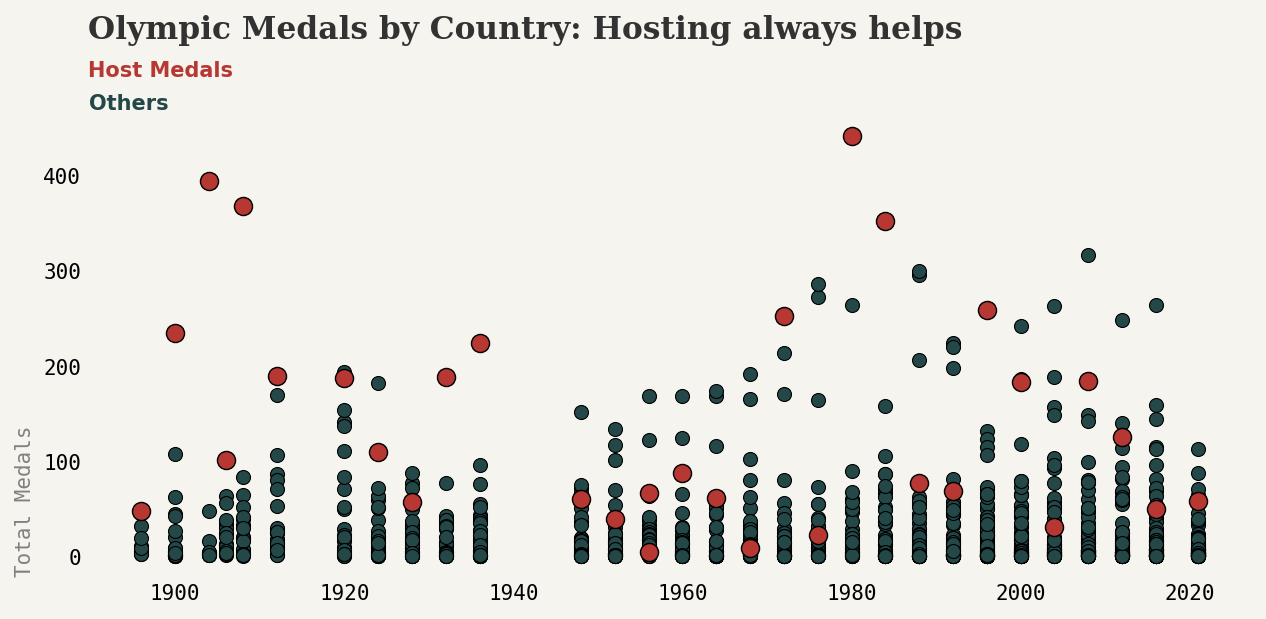

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,4), facecolor=background_color)

sns.scatterplot(data=df_new.query("Is_Host == 0"), x='Year', y='Total Medals', s=45, ec='black', color='#244747',ax=ax)
sns.scatterplot(data=df_new.query("Is_Host == 1"), x='Year', y='Total Medals', s=75, ec='black', color='#B73832',ax=ax)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("Total Medals",fontfamily='monospace',loc='bottom',color='gray')
ax.set_xlabel("")

ax.set_facecolor(background_color)
ax.set_axisbelow(True)


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)


ax.text(Xstart,Yend+80, 'Olympic Medals by Country: Hosting always helps', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend+40, 'Host Medals', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(Xstart,Yend+5, 'Others', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#244747')

plt.show()


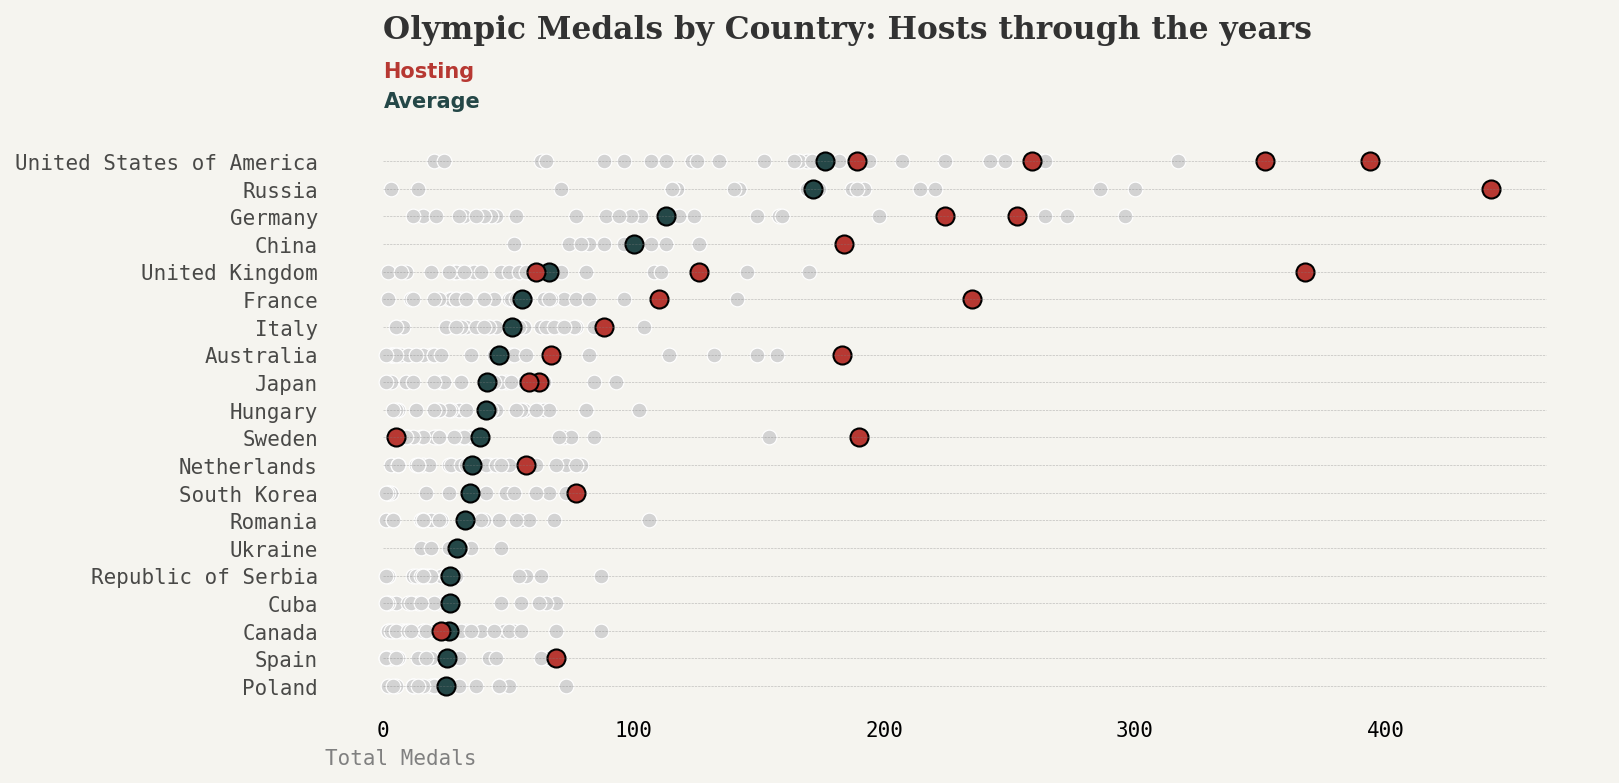

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(11, 5), facecolor=background_color)

# top 20
top_list_ = df_new.groupby('region')['Total Medals'].mean().sort_values(ascending=False).reset_index()[:20].sort_values(by='Total Medals',ascending=True)

plot = 1
for country in top_list_['region']:
    mean = df_new[df_new['region'] == country].groupby('region')['Total Medals'].mean()
    # historic scores
    sns.scatterplot(data=df_new[df_new['region'] == country], y=plot, x='Total Medals',color='lightgray',s=50,ax=ax)
    # mean score
    sns.scatterplot(data=df_new[df_new['region'] == country], y=plot, x=mean,color='#244747',ec='black',linewidth=1,s=75,ax=ax)
    # Hosting score
    sns.scatterplot(data=(df_new[(df_new['region'] == country) & (df_new['Is_Host'] == 1)]), y=plot, x='Total Medals',color='#B73832',ec='black',linewidth=1,s=75,ax=ax)
    plot += 1

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['region'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Total Medals",fontfamily='monospace',loc='left',color='gray')
ax.set_facecolor(background_color)
ax.hlines(y=top_list_.index+1, xmin=0, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)



ax.text(0,Yend+3.5, 'Olympic Medals by Country: Hosts through the years', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(0,Yend+2.1, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')
ax.text(0,Yend+1, 'Average', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#244747')


plt.show()

In [ ]:
sample = df_new.groupby(['region','Is_Host'])['Gold'].mean().unstack().dropna()
sample = sample.rename(columns={0 : "Not Hosting", 1 : "Hosting"})
sample = sample.reset_index().query("region == 'Japan' | region == 'Brazil' | region == 'United Kingdom' | region == 'China' | region == 'Greece' ").set_index('region')

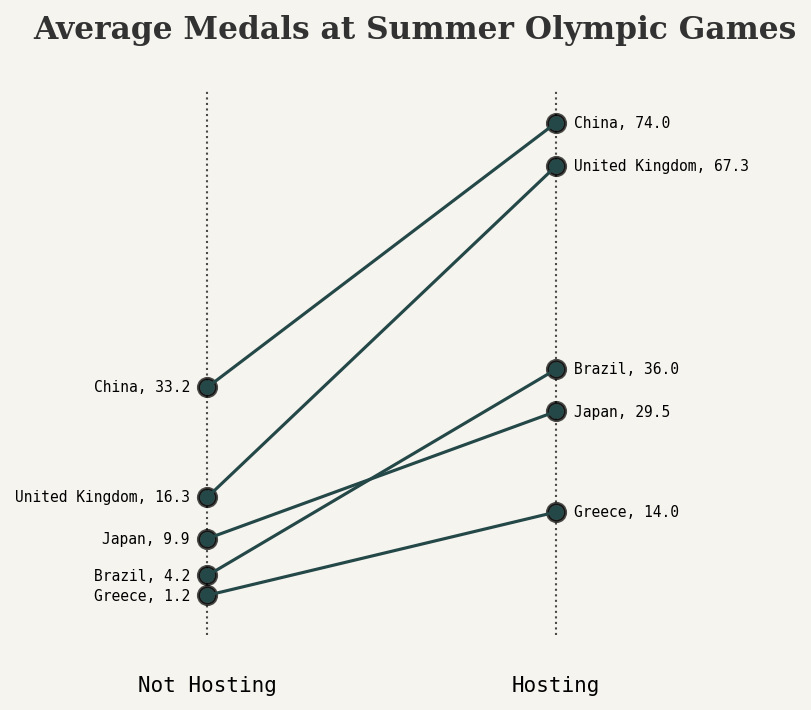

In [ ]:
import matplotlib.lines as mlines

low_c = '#B73832'
high_c = '#244747'

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(sample.index, sample['Not Hosting'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(sample.index, sample['Hosting'])]
klass = [low_c if (y1-y2) < 0 else high_c for y1, y2 in zip(sample['Not Hosting'], sample['Hosting'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=low_c if p1[1]-p2[1] > 0 else high_c, marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(6,5), dpi= 150, facecolor=background_color)

ax.set_facecolor(background_color)
ax.vlines(x=1, ymin=-5, ymax=100, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=-5, ymax=100, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=sample['Not Hosting'], x=np.repeat(1, sample.shape[0]), s=75,linewidth=1.5, color='black', alpha=0.7)
ax.scatter(y=sample['Hosting'], x=np.repeat(3, sample.shape[0]), s=75, linewidth=1.5,color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(sample['Not Hosting'], sample['Hosting'], sample.index):
    newline([1,p1], [3,p2])
    ax.text(1-0.1, p1, c + ', ' + str(round(p1,1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':7})
    ax.text(3+0.1, p2, c + ', ' + str(round(p2,1)), horizontalalignment='left', verticalalignment='center', fontdict={'size':7})


ax.text(0,87,"Average Medals at Summer Olympic Games", fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')

ax.set(xlim=(0,4), ylim=(-10,sample.max().max()+5), ylabel='') #ylim=(),
ax.set_xticks([1,3])
ax.set_xticklabels(["Not Hosting", "Hosting"],fontsize=10)
#ax.xaxis.tick_top()

for s in ["top","right","left","bottom"]:
    ax.spines[s].set_visible(False)

ax.tick_params(axis='both',which='both',length=0,labelleft=False)
plt.rcParams["font.family"] = "monospace"

plt.show()

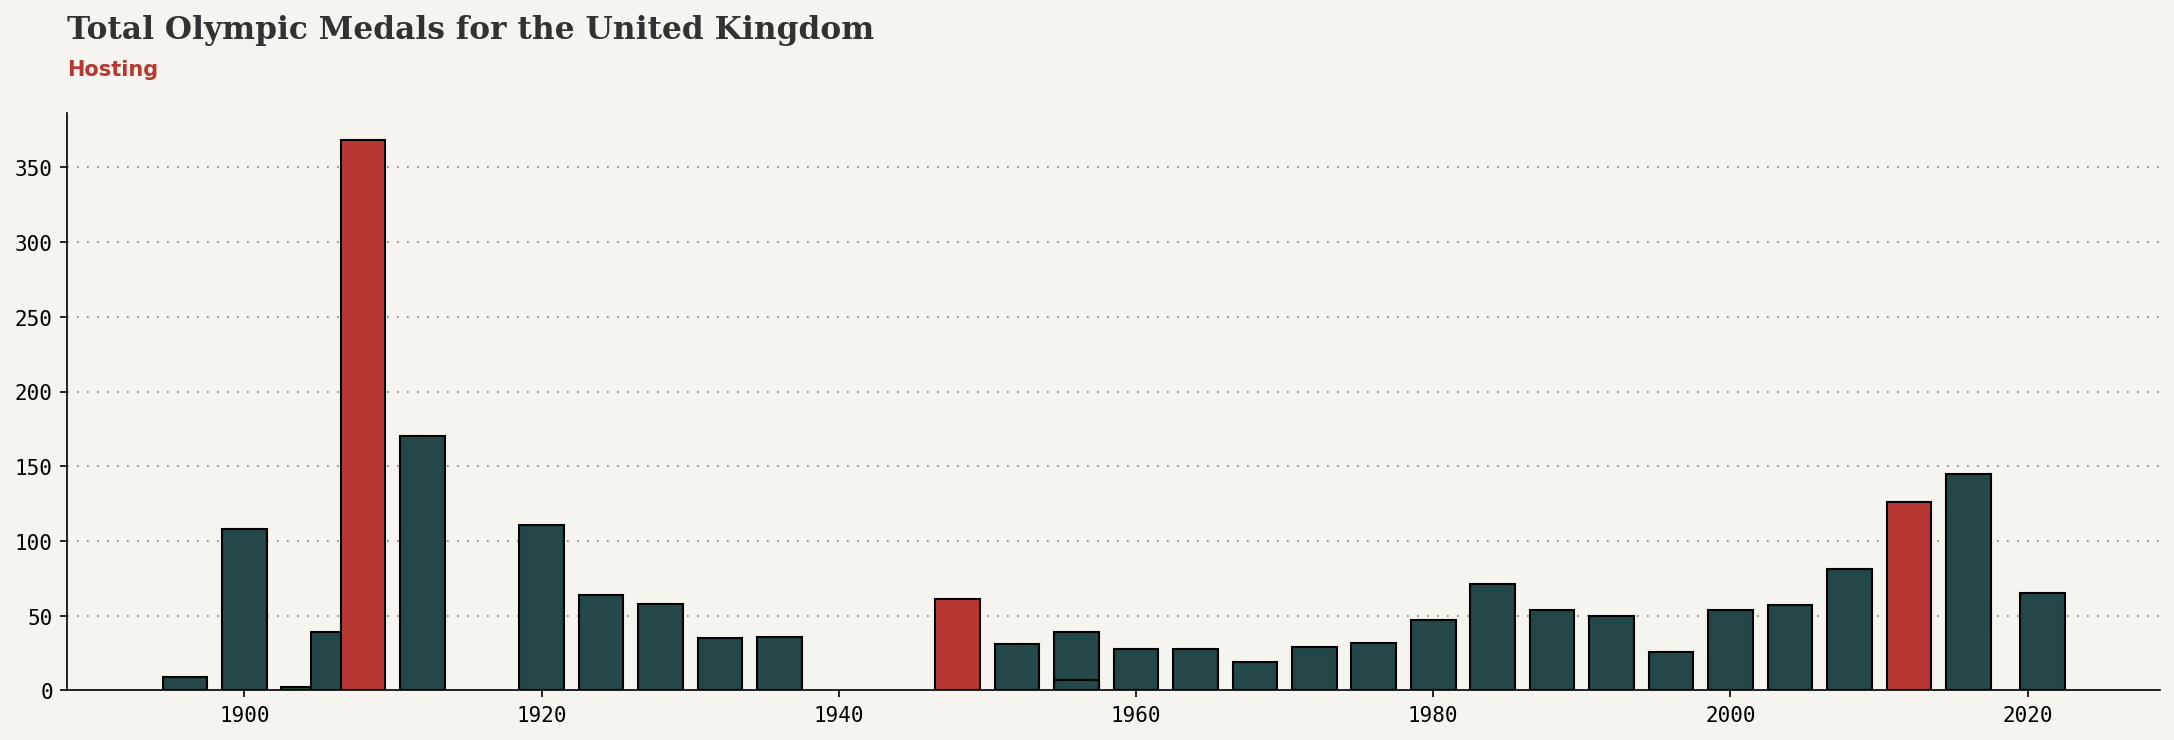

In [ ]:
temp = df_new.query("region == 'United Kingdom'")


fig, ax = plt.subplots(1, 1, figsize=(18, 5), dpi=150, facecolor=background_color)

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor(background_color)
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+50, 'Total Olympic Medals for the United Kingdom', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart,Yend+25, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='#B73832')

plt.show()

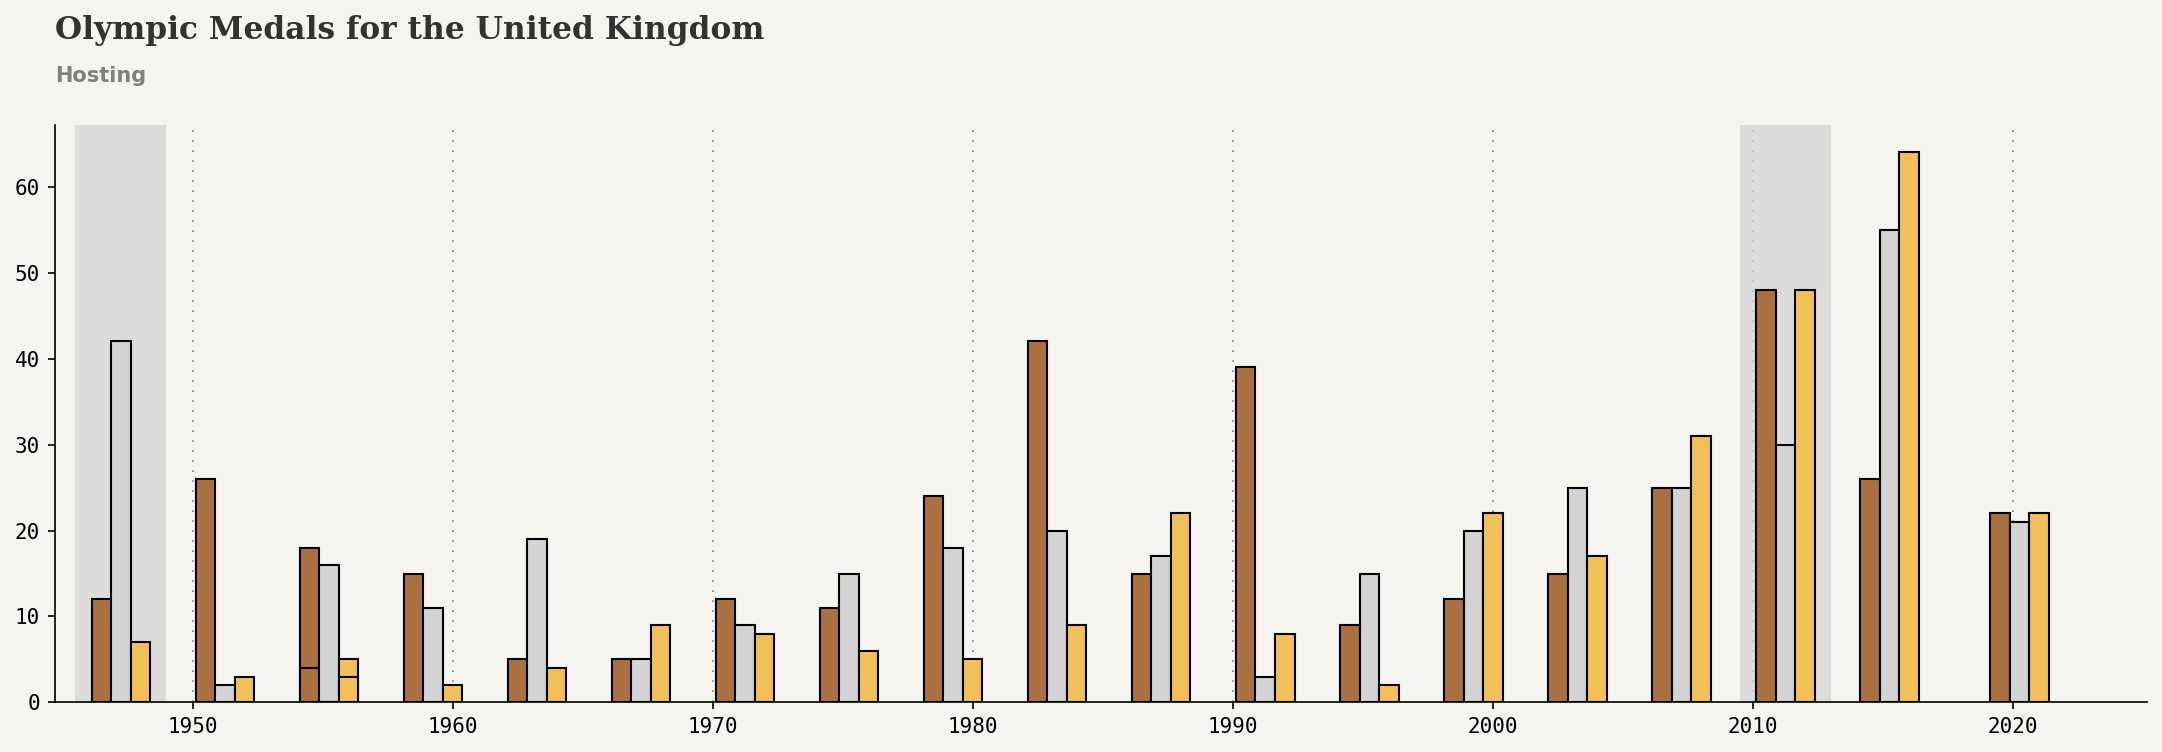

In [ ]:
temp = df_new.query("region == 'United Kingdom' & Year > 1945")

fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor=background_color)

ax.set_facecolor(background_color)

color = ["#a97142", "lightgray", '#f0c05a']


# Host years
ax.axvspan(1949,1945.5, facecolor='lightgray',alpha=0.7)
ax.axvspan(2013,2009.5, facecolor='lightgray',alpha=0.7)

medals_list = ['Bronze', 'Silver', 'Gold']
width = 0.75
for i, medal in enumerate(np.array(medals_list)):
    ax.bar(temp['Year']+(width*(i-2)), temp[medal], width, color=color[i], label=medal, ec='black')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)


Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart+3,Yend+10, 'Olympic Medals for the United Kingdom', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart+3,Yend+5, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='gray')


ax.set_xlim(Xstart+3, Xend)

ax.grid(which='both', axis='x', zorder=5, color='gray', linestyle=':', dashes=(1,5))

ax.set_axisbelow(True)

plt.show()

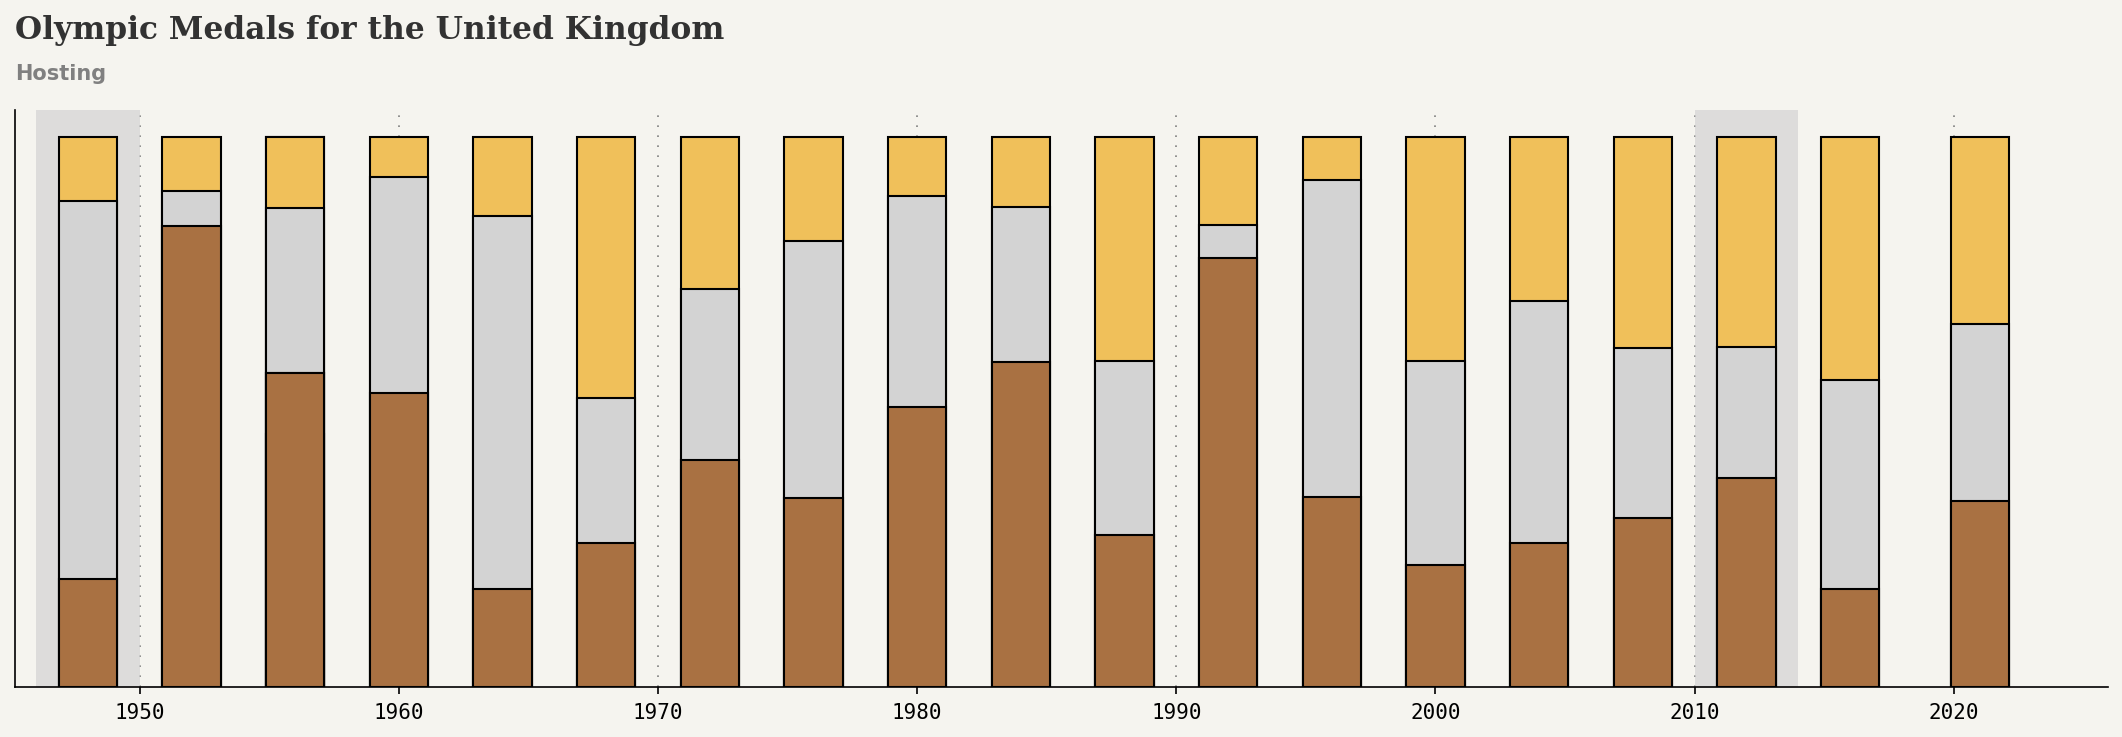

In [ ]:
stack_temp = df_new.query("region == 'United Kingdom' & Year > 1945")[['Year','Bronze','Silver','Gold']].set_index('Year')
stack_temp = (stack_temp.T/stack_temp.sum(axis=1)).cumsum().T

fig, ax = plt.subplots(1,1, figsize=(18,5), facecolor=background_color)

# Host years
ax.axvspan(1950,1946, facecolor='lightgray',alpha=0.7)
ax.axvspan(2014,2010, facecolor='lightgray',alpha=0.7)


color = ["#a97142", "lightgray", '#f0c05a']
medals_list = ['Bronze', 'Silver', 'Gold']

for i, medal in enumerate(medals_list[::-1]):
    sentims = stack_temp[medal]
    ax.bar(sentims.index, sentims, color=color[::-1][i], label=medal, width=2.25, ec='black')

ax.set_facecolor(background_color)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)


Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_xlim(Xstart+3, Xend)
ax.grid(which='both', axis='x', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)
ax.get_yaxis().set_visible(False)

ax.text(Xstart+3,Yend+0.13, 'Olympic Medals for the United Kingdom', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart+3,Yend+0.055, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='gray')


plt.show()

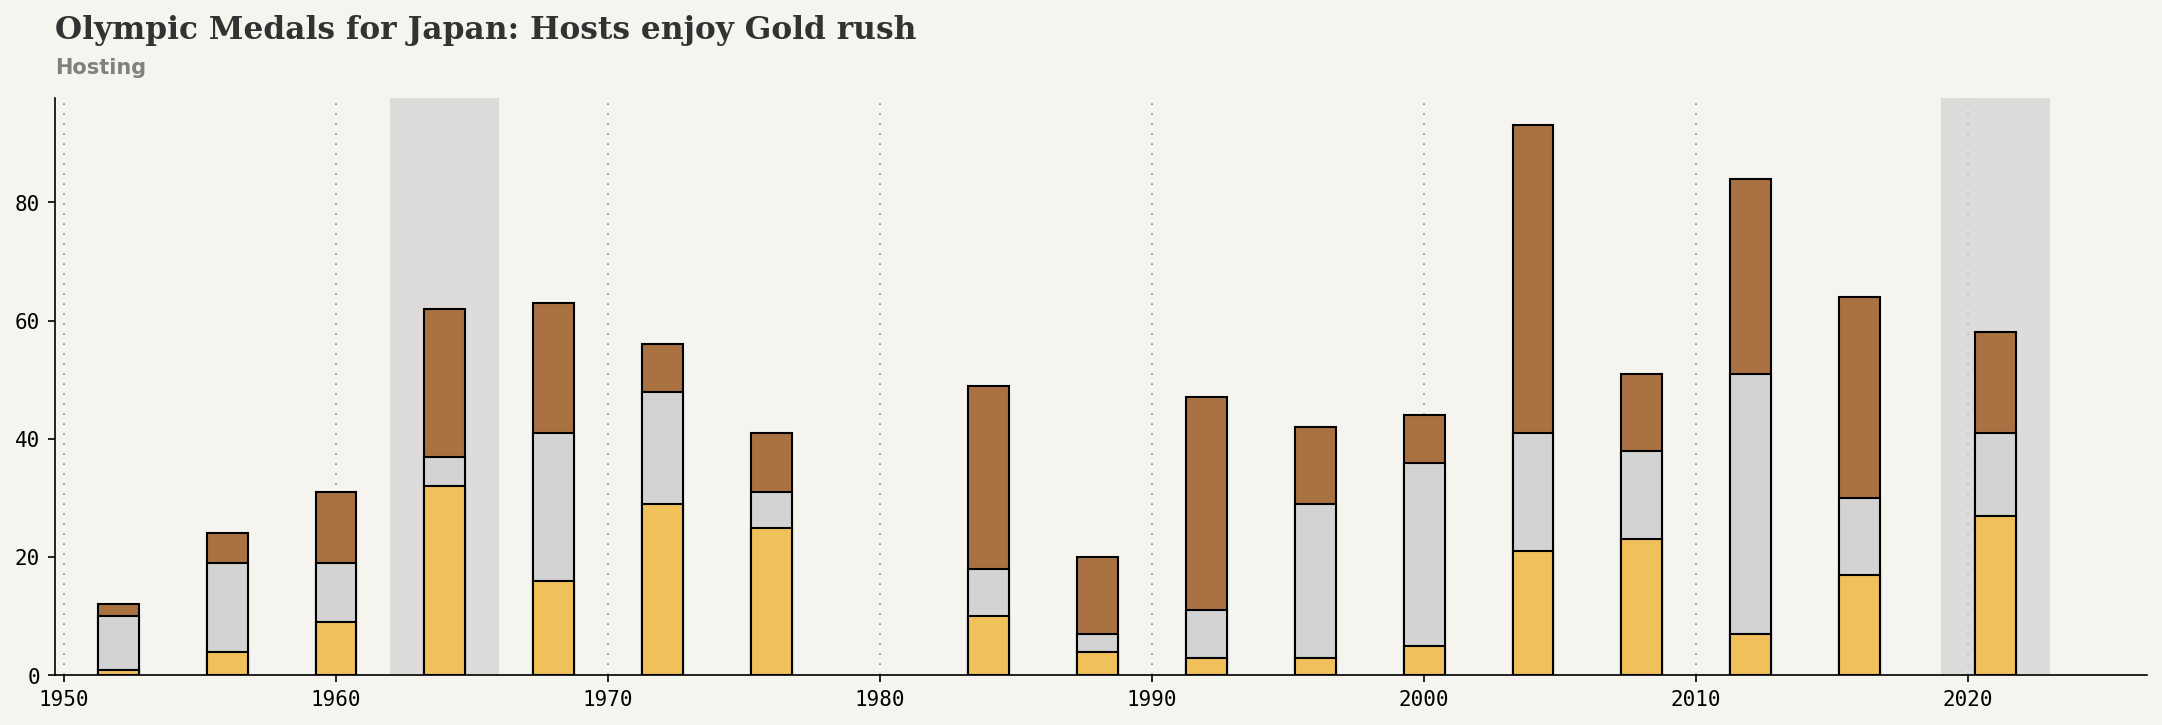

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor=background_color)

ax.set_facecolor(background_color)

color = ["#a97142", "lightgray", '#f0c05a']

# Host years
ax.axvspan(2023,2019, facecolor='lightgray',alpha=0.7)
ax.axvspan(1966,1962, facecolor='lightgray',alpha=0.7)


for i, medal in enumerate(medals_list):
    temp = df_new.query("region == 'Japan' & Year > 1945").groupby(['Year'])['Gold','Silver','Bronze'].sum().cumsum(axis=1)[medal]
    ax.bar(temp.index, temp, color=color[i],width=1.5,ec='black')


Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart+2,Yend+10, 'Olympic Medals for Japan: Hosts enjoy Gold rush', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
ax.text(Xstart+2,Yend+4, 'Hosting', fontsize=10,fontweight='bold',fontfamily='sansserif',color='gray')

ax.set_xlim(Xstart+2, Xend)
ax.grid(which='both', axis='x', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

In [ ]:
from scipy.stats import ttest_ind

print("T-Test")
# compare samples
stat, p = ttest_ind(df_new[df_new['region'].isin(host_list)].query("Is_Host == 0")['Total_Medals_NaturalLog'], df_new[df_new['region'].isin(host_list)].query("Is_Host == 1")['Total_Medals_NaturalLog'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

T-Test
Statistics=-5.583, p=0.000
Different distributions (reject H0)
